<h1 id="tocheading">Chapter6_深入NumPy模块</h1>
<div id="toc"></div>

NumPy一些模块在SciPy中也有对应部分，并且功能可能更加丰富。

numpy.dual 模块包含同时在NumPy 和SciPy中定义的函数

知识点

+ linalg 模块
    - 包含线性代数的函数
    - `np.linalg.inv` 逆矩阵
+ fft 模块
    - fft模块提供了快速傅立叶变换的功能
+ 随机数
    - random
    - hypergeometric
+ 连续分布 离散分布

## 逆矩阵

In [84]:
import numpy as np

In [85]:
A = np.mat("0 1 2; 1 0 3; 4 -3 8")
A

matrix([[ 0,  1,  2],
        [ 1,  0,  3],
        [ 4, -3,  8]])

In [86]:
inverse = np.linalg.inv(A)
inverse

matrix([[-4.5,  7. , -1.5],
        [-2. ,  4. , -1. ],
        [ 1.5, -2. ,  0.5]])

In [87]:
A * inverse

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

>如果输入的是奇异矩阵或非方阵，会抛出LinAlgError异常

奇异矩阵，即行列式为0的矩阵

In [88]:
test = np.mat("0 1 2; 1 0 3; 4 -3 8; 1 1 1")
test

matrix([[ 0,  1,  2],
        [ 1,  0,  3],
        [ 4, -3,  8],
        [ 1,  1,  1]])

In [89]:
try:
    np.linalg.inv(test)
except Exception as ex:
    print("LinAlgError: {}".format(ex))

LinAlgError: Last 2 dimensions of the array must be square


## 求解线性方程组

矩阵对向量进行线性变换，对应于数学中的线性方程组。 `numpy.linalg`中`solve`可以求解 如`Ax =b`的线性方程组。A为矩阵，b为一维或二维数组。

dot 点积，检查求解是否正确

In [90]:
A = np.mat("1 -2 1; 0 2 -8; -4 5 9")
A

matrix([[ 1, -2,  1],
        [ 0,  2, -8],
        [-4,  5,  9]])

In [91]:
b = np.array([0,8,-9])
b

array([ 0,  8, -9])

In [92]:
x = np.linalg.solve(A,b)
x

array([ 29.,  16.,   3.])

In [93]:
np.dot(A,x)

matrix([[ 0.,  8., -9.]])

## 特征值 特征向量

+ 特征值 eigenvalue 即方程${\bf A}x=ax$的根，是标量，A二维矩阵，x 一维向量。
+ 特征向量 eigenvector 是关于特征值的向量。 
+ numpy.linalg中 `eigvals`计算特征值 `eig` 返回一个包含特征值和对应特征向量的元组

In [94]:
A = np.mat("3 -2; 1 0")
A

matrix([[ 3, -2],
        [ 1,  0]])

In [95]:
print("特征值")
np.linalg.eigvals(A)

特征值


array([ 2.,  1.])

In [96]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("特征值")
print(eigenvalues)

print("特征向量")
eigenvectors

特征值
[ 2.  1.]
特征向量


matrix([[ 0.89442719,  0.70710678],
        [ 0.4472136 ,  0.70710678]])

In [97]:
for i in range(len(eigenvalues)):
    print("Left {}".format(np.dot(A, eigenvectors[:,i])))
    print("Right {}".format(eigenvalues[i] * eigenvectors[:,i]))
    print("")

Left [[ 1.78885438]
 [ 0.89442719]]
Right [[ 1.78885438]
 [ 0.89442719]]

Left [[ 0.70710678]
 [ 0.70710678]]
Right [[ 0.70710678]
 [ 0.70710678]]



## 奇异值分解

SVD（Singular Value Decomposition）是一种因子分解运算，将一个矩阵分解为3 个矩阵的乘积。 奇异值分解是前面讨论过的特征值分解的一种推广。

svd 函数可以对矩阵进行奇异值分解，返回3个矩阵 - U, Sigma V, U 和V是正交矩阵，Sigma包含输入矩阵的奇异值

$$ M = U\sum V^*$$

星号表示厄米共轭(Hermitian conjugate) 或 共轭转置(conjugate transpose)


In [98]:
A = np.mat("4 11 14; 8 7 -2")
A

matrix([[ 4, 11, 14],
        [ 8,  7, -2]])

In [99]:
U, Sigma, V = np.linalg.svd(A, full_matrices=False)
print("U")
print(U)
print("Sigma")
print(Sigma)
print("V")
print(V)

U
[[-0.9486833  -0.31622777]
 [-0.31622777  0.9486833 ]]
Sigma
[ 18.97366596   9.48683298]
V
[[-0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]]


没有得到真正的中间的奇异值矩阵 - 得到的只是其对角线上的值，而非对角线的值均为0.使用 diag函数生成完整奇异矩阵

In [100]:
U * np.diag(Sigma) * V

matrix([[  4.,  11.,  14.],
        [  8.,   7.,  -2.]])

## 广义逆矩阵

摩尔 彭罗斯广义逆矩阵(Moore-Penrose pseudoinverse) 使用pinv 函数求解

+ inv 仅接受方阵作为输入矩阵
+ pinv 没有方阵限制

In [101]:
A = np.mat("4 11 14; 8 7 -2")
A

matrix([[ 4, 11, 14],
        [ 8,  7, -2]])

In [102]:
pseudoinv = np.linalg.pinv(A)
pseudoinv

matrix([[-0.00555556,  0.07222222],
        [ 0.02222222,  0.04444444],
        [ 0.05555556, -0.05555556]])

In [103]:
A * pseudoinv

matrix([[  1.00000000e+00,  -9.29811783e-16],
        [ -1.66533454e-16,   1.00000000e+00]])

## 行列式

行列式(determinant)是与方阵相关的一个标量值。对于一个 nXn实数矩阵，行列式描述的是一个线性变换对“有向体积”造成的影响。

行列式的值为正，表示保持了空间的定向（顺时针/逆时针），为负表示颠倒了空间的定向。

det函数计算矩阵的行列式

In [104]:
A = np.mat("3 4; 5 6")
A

matrix([[3, 4],
        [5, 6]])

In [105]:
np.linalg.det(A)

-1.9999999999999971

## 快速傅立叶变换

FFT(Fast Fourier Transform)是一种高效的计算DFT(Discrete Fourier Transform)算法。 FFT算法比根据定义直接计算更快，计算复杂度 O(NlogN)。 DFT在信号处理、图像处理、求解偏微分方程等方面有应用。

NumPy中，fft模块提供了快速傅立叶变换的功能。该模块中，很多函数称对存在，即很多函数存在对应的逆操作函数，如fft和ifft

In [114]:
# 创建包含30个点的余弦波信号

x = np.linspace(0,2 * np.pi, 30)
wave = np.cos(x)

# 使用fft对余弦波信号进行傅立叶变换
transformed = np.fft.fft(wave)

# 对变换后的结果应用ifft函数，近似还原初始信号
org_back = np.fft.ifft(transformed)

np.all(np.abs(org_back - wave)< 10 ** -9)

True

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

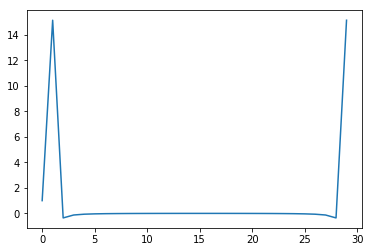

In [118]:
plt.plot(transformed)

## 移频

fftshift 可以将fft输出中的直流分量移动到频谱中央，ifftshift是其逆操作

In [119]:
x = np.linspace(0, 2 * np.pi, 30)
wave = np.cos(x)

transformed = np.fft.fft(wave)

shifted = np.fft.fftshift(transformed)

np.all((np.fft.ifftshift(shifted) - transformed) < 10 ** -9)

True

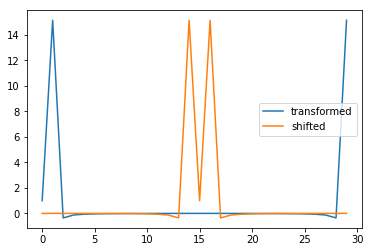

In [120]:
plt.plot(transformed, label='transformed')
plt.plot(shifted, label='shifted')
plt.legend(loc='best')

## 随机数

随机数在蒙特卡罗(Monto Carlo method)、随机积分等很多方面有应用。实际常使用伪随机数。

random模块

随机数发生器核心算法基于马特赛特旋转演算法(Mersenne Twister algorithm)，随机数从离散分布或连续分布中产生。

In [121]:
cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size = len(cash))


In [124]:
for i in range(1, len(cash)):
    if outcome[i]<5:
        cash[i] = cash[i-1] -1
    elif outcome[i]<10:
        cash[i] = cash[i-1] + 1
    else:
        raise AssertionError("Unexpected outcome {}".format(outcome))
        
print(outcome.min())
print(outcome.max())
        

0
9


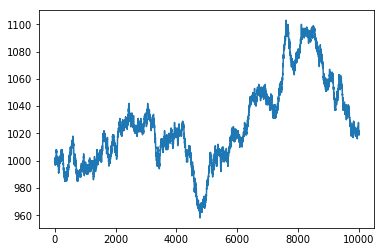

In [126]:
plt.plot(np.arange(len(cash)),cash)

剩余资本呈随机游走(random walk)状态

## 超几何分布

超几何分布(hypergeometric distribution)是一种离散概率分布，描述罐子里有两种物件，无放回的从中抽取指定数量的物件后，抽出指定种类物件的数量。

random 模块中hypergeometric函数可模拟

In [ ]:
## 

In [125]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>